# surf特征提取算法

对图像来说，提取特征的基本要求在于三个要点：

* 尺度不变性
* 旋转不变性
* 平移不变性

那么对于这个特征，应当包含三个方面的内容：

* 位置信息
* 方向信息
* 特征描述

对于sift特征来说：

* 位置信息表征了图像中的关键匹配点位置
* 方向信息则为特征添加了旋转不变性
* 特征描述则是为特征添加了尺度不变性：因为关键点是从不同尺度中图像获取，并且从对应的16\*16的对应尺度空间上获取特征。

### surf对于sift的改进

surf特征是对于sift特征的改进算法。

sift特征提取算法中，关键点的提取和筛选需要耗费大量的计算资源

surf则是对关键点的提取方法提出了改进，从而获得更加快速和稳健的特征表达

### surf特征的基本步骤

基本原理：

- 利用hessian矩阵，特征点检测过程

- 通过不同尺寸的box filter来构建金字塔

- 使用haar小波变换来确定特征点的方式

#### 基本概念

1. 积分图

图像积分就是对一定区域内的像素求和。

积分图中每个点的值，为该点至(0, 0)点的像素值之和。

为了节省计算资源，积分图可以用增量的方式计算。

即每个像素点不需要计算重合区域。

积分图的好处在于：积分图中任意矩形内的像素值之和，只需要确定四个角的像素即可

2. 盒子滤波

对固定大小的矩形区域，计算该区域内所有像素的平均值，并作为中心像素的值。

高斯滤波需要计算每个像素值的加权和，但结合积分图和盒子滤波，就能通过查表运算来完成对不同尺度图像的滤波。

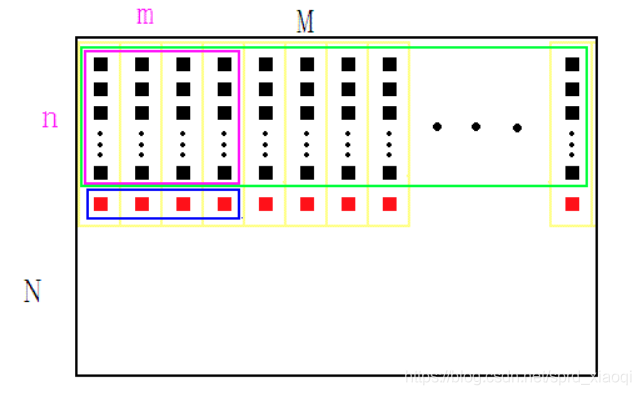

3. hessian矩阵构建

对不同尺度的图像构建hessian变换

hessian变换是指，通过三种不同的滤波模板，对图像进行滤波

而后以行列式的方式将其融合，得到最终的hessian矩阵图像

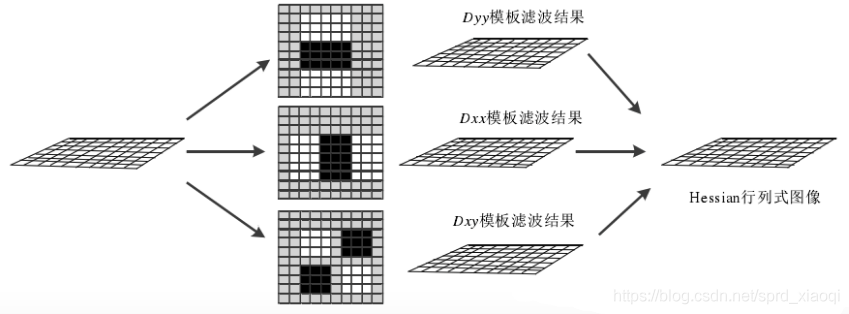

4. haar小波响应

在surf算法中，haar小波响应运算用于计算图像区域的特征向量。

对每个检测到得到特征点，周围$4\times 4$的区域将被用于计算该特征点的特征向量。

例如，对于一个$20\times20$的区域，首先将其划分为$4\times4$的子块

```
1 2 3 4
2 3 4 5
3 4 5 6
4 5 6 7

```

而后，按照行列分别求和，得到

```
sum_rows: [10 14 18 22]
sum_cols: [10 14 18 22]

```

可根据差别计算小波响应值

```
H1 = sum_rows[0] + sum_rows[2] - sum_rows[1] - sum_rows[3] = -4
H2 = sum_cols[0] + sum_cols[2] - sum_cols[1] - sum_cols[3] = -4

```

#### 基本步骤

1. 获取空间金字塔

先对图像采用不同尺度的高斯模糊，而后采用不同尺度的hessian变换获取图像的差分金字塔

其中高斯模糊的过程用box filter获取，并通过积分图进行加速。

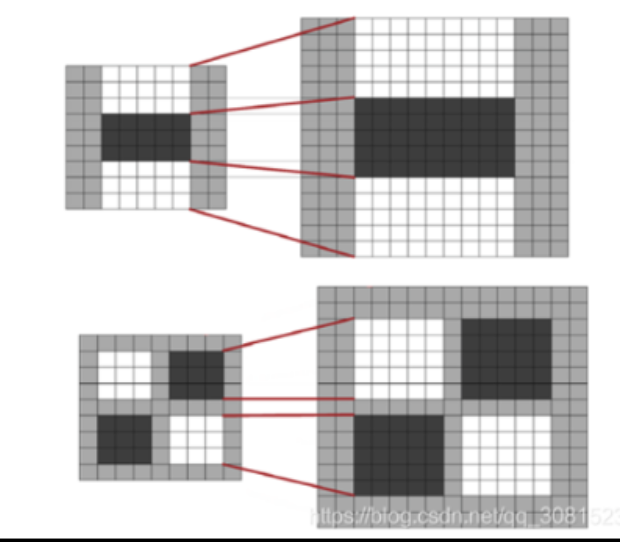


只改变尺度不改变图像的shape，得到的不同尺度图像的尺寸是一致的。

载sift中，同一个octave中的图像是逐渐缩小的，但surf中，同一个octave的图像是一样大的。

在这个过程中，积分图用来加速

2. 特征点检测

同sift一样，特征点检测依然在同一个octave中的上下三层矩阵进行

选取27个相临像素后，如果当前中心点是一个极大值，那么就保留，否则去除



不同点在于：

* sift使用差分高斯图像作为输入

* surf使用hessian变换作为输入



相比sift，此处surf有三个主要优势：

    1. 计算效率更高
    
    2. 方向选择更加准确
    
    3. 更加鲁棒

同样地，surf也会产生产生较多的噪声点，因此同样需要筛选。

3. 确定主方向

为了保证特征点具有旋转不变形，也需要为每个特征点分配一个主要方向。

具体上，以特征点为中心，六倍标准差为半径的圆形区域，对图像进行haar小波响应运算。

Harr特征值反应了图像灰度变化的情况，那么这个主方向就是描述那些灰度变化特别剧烈的区域方向。

以特征点为中心，张角为π/3的扇形滑动，计算窗口内的Harr小波响应值dx、dy的累加

具体上：

    1. 确定一个尺度，并确定关键点的方向区间。
    2. 将关键点周围的区域划分为多个子区域，例如4x4的矩形子区域。
    3. 在每个子区域内，通过Haar小波响应计算dx、dy的累加值，并通过高斯加权对每个子区域内的像素进行加权。
    4. 根据计算得到的所有累加值，统计不同方向的响应值，并计算加权和，以确定关键点的主方向。

4. surf特征描述

生成特征描述需要两个步骤：

- 旋转方向
- 描述特征

对每个特征点，先获取$20\times20$的区域，然后进行旋转

在图像上使用水平和垂直的haar模板求的响应，然后根据主方向旋转dx和dy与主方向保持一致

而后，将图像划分16个区域，分别计算haar响应。

每个haar响应为4个数值，因此surf算子得到的特征共有64个特征。

### surf特征的opencv实现

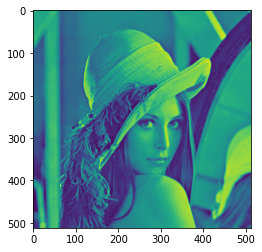

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('../../dataset/lena.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

surf = cv.xfeatures2d.SURF_create(400)

上述报错解决方案：

安装更低版本的opencv
